In [56]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [103]:
# 2016 Census data from Open Data Toronto (https://open.toronto.ca/dataset/neighbourhood-profiles/)
# Dataset cleaned up using MS Excel
# Each data point represents one of Toronto's 140 neighbourhoods
# Metrics such as Commute Mode Score calcuated as a single figure (score based on percentages of mode share, with heavier weighting for public transit and active transportation)

neighbourhoods['Neighbourhood Number'] = neighbourhoods['Neighbourhood Number'].astype(str)
neighbourhoods.rename(columns = {'Population density per square kilometre':'Density'}, inplace = True)
neighbourhoods.head()

,Neighbourhood,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Density,Land area in square kilometres,Age Score,...,Public transit,Public Transit Mode Share,Walked,Walk Mode Share,Bicycle,Bicycle Mode Share,Commute Mode Score,Commute Duration Score,Commute Time Score,Cluster
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,3929,7.41,2.59,...,3350,0.28,265,0.02,70,0.01,1.68,3.03,0.50,2
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,3034,7.83,2.46,...,2985,0.29,280,0.03,35,0.00,1.71,3.01,0.58,2
2,Alderwood,20,No Designation,12054,11904,0.013,4732,2435,4.95,2.53,...,1285,0.21,195,0.03,65,0.01,1.59,2.70,0.01,2
3,Annex,95,No Designation,30526,29177,0.046,18109,10863,2.81,2.50,...,6200,0.42,3200,0.21,1675,0.11,3.12,2.48,0.84,4
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,2775,9.98,2.77,...,2945,0.26,615,0.05,65,0.01,1.75,2.80,0.41,0


In [30]:
neighbourhoods.columns

Index(['Neighbourhood', 'Neighbourhood Number', 'TSNS2020 Designation',
       'Population, 2016', 'Population, 2011', 'Population Change 2011-2016',
       'Total private dwellings', 'Density', 'Land area in square kilometres',
       'Age Score', '% Children', 'Number of persons in private households',
       ' Average household size', 'Ownership Rate', 'Total - Commuting',
       '% Commute outside CSD',
       'Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data',
       '  Car, truck, van - as a driver', 'Private Vehicle Mode Share',
       '  Car, truck, van - as a passenger',
       'Private Vehicle (Passenger) Mode Share', '  Public transit',
       'Public Transit Mode Share', '  Walked', 'Walk Mode Share', '  Bicycle',
       'Bicycle Mode Share', 'Commute Mode Score', 'Commute Duration Score',
       'Commute Time Score'],
      dtype='object')

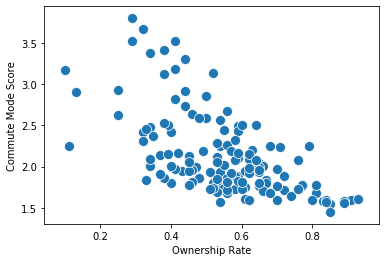

In [104]:
# For this exercise in K-Means Clustering, several scatterplots were generated to see where there could be cluster
# Ownership Rate vs Commute Mode Score were selected, as there are some clisters evident in this scatterplot
# Ownership Rate = # of dwellings owned/# of total private dwellings
# Commute Mode Score = %Private Vehicle*1 + %Private Vehicle(as passenger)*1 + %Public Transit*3 + %Walk*5 + %Bicycle*5

ax = sns.scatterplot(data = neighbourhoods, 
                     x = 'Ownership Rate',
                     y = 'Commute Mode Score',
                     s = 100)

In [51]:
# Some quick stats on both these fields, and we can see we should normalize the data

neighbourhoods[['Ownership Rate', 'Commute Mode Score']].describe().round(2)

,Ownership Rate,Commute Mode Score
count,140.00,140.00
mean,0.55,2.13
std,0.16,0.50
min,0.10,1.45
25%,0.44,1.78
50%,0.55,1.99
75%,0.65,2.33
max,0.93,3.80


In [52]:
# Using sklearn standard scaler to normilize the data so that means for both fields will be set to 0

scaler = StandardScaler()
neighbourhoods_scaled = scaler.fit_transform(neighbourhoods[['Ownership Rate', 'Commute Mode Score']])

In [53]:
neighbourhoods_scaled = pd.DataFrame(neighbourhoods_scaled, 
                                columns = ['Ownership Rate', 'Commute Mode Score'])

In [54]:
neighbourhoods_scaled.describe().round(2)

,Ownership Rate,Commute Mode Score
count,140.00,140.00
mean,0.00,0.00
std,1.00,1.00
min,-2.73,-1.38
25%,-0.67,-0.72
50%,0.02,-0.29
75%,0.63,0.40
max,2.34,3.37


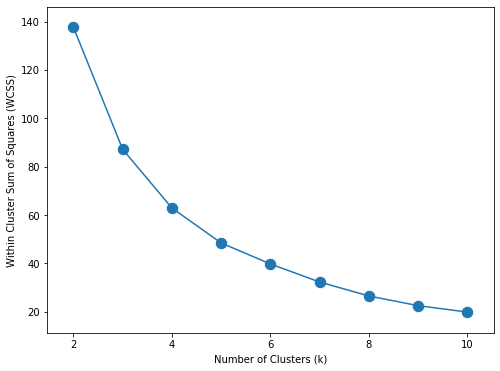

In [57]:
# Using the Elbow Method to decide how many clusters to use. Looking for the elbow point, and where it falls on the x-axis
# It is a bit subjective as 4 or 5 clusters could work, but decided to go with 5 clusters

wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(neighbourhoods_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

In [69]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)

In [70]:
# fitting the model

km.fit(neighbourhoods_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [71]:
# Generating labels for 5 clusters for the 140 data points

km.labels_

array([2, 2, 2, 4, 0, 0, 4, 0, 0, 2, 3, 0, 0, 3, 1, 3, 2, 3, 3, 4, 0, 3,
       2, 4, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0, 3, 2, 0, 3, 3,
       0, 0, 1, 2, 3, 3, 1, 2, 2, 0, 2, 0, 3, 3, 0, 1, 0, 0, 4, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 4, 3, 0, 0, 3, 3, 0, 0, 1,
       1, 4, 3, 1, 3, 0, 4, 3, 2, 1, 2, 2, 4, 0, 0, 1, 1, 2, 2, 3, 3, 4,
       1, 0, 2, 0, 0, 3, 0, 0, 3, 1, 4, 3, 4, 0, 2, 3, 3, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 3, 3, 3, 0], dtype=int32)

In [72]:
# How closely data points are clustered, based on distance of data points to cluster centroids. Low inertia is ideal

km.inertia_

48.469117428538574

In [73]:
# Ideally each cluster would be similar in size, however Cluster 0 is much larger than the others

pd.Series(km.labels_).value_counts().sort_index()

0    55
1    19
2    24
3    30
4    12
dtype: int64

In [74]:
km.cluster_centers_

array([[ 0.25164828, -0.4769607 ],
       [-0.11598263,  0.90295933],
       [ 1.51265667, -0.88130942],
       [-1.02261241,  0.0416738 ],
       [-1.43853111,  2.41481861]])

In [75]:
# Where each cluster centroid falls

cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Ownership Rate', 'Commute Mode Score'])
#cluster_centers

,Ownership Rate,Commute Mode Score
0,0.251648,-0.476961
1,-0.115983,0.902959
2,1.512657,-0.881309
3,-1.022612,0.041674
4,-1.438531,2.414819


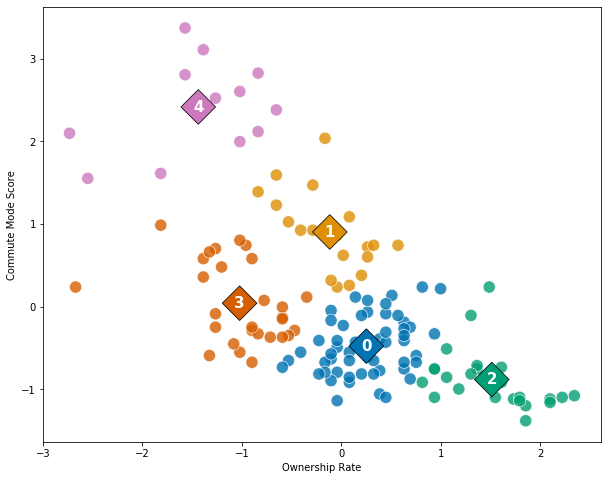

In [88]:
# Plotting the scatterplot again, this time segmenting data by colour and labelling each cluster

# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = neighbourhoods_scaled,
                     x = 'Ownership Rate',
                     y = 'Commute Mode Score', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Ownership Rate',
                     y = 'Commute Mode Score', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers['Ownership Rate'][i], 
                        y = cluster_centers['Commute Mode Score'][i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [105]:
# Adding Cluster # to original df

neighbourhoods['Cluster'] = km.labels_.tolist()
neighbourhoods.head(5)

,Neighbourhood,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Density,Land area in square kilometres,Age Score,...,Public transit,Public Transit Mode Share,Walked,Walk Mode Share,Bicycle,Bicycle Mode Share,Commute Mode Score,Commute Duration Score,Commute Time Score,Cluster
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,3929,7.41,2.59,...,3350,0.28,265,0.02,70,0.01,1.68,3.03,0.50,2
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,3034,7.83,2.46,...,2985,0.29,280,0.03,35,0.00,1.71,3.01,0.58,2
2,Alderwood,20,No Designation,12054,11904,0.013,4732,2435,4.95,2.53,...,1285,0.21,195,0.03,65,0.01,1.59,2.70,0.01,2
3,Annex,95,No Designation,30526,29177,0.046,18109,10863,2.81,2.50,...,6200,0.42,3200,0.21,1675,0.11,3.12,2.48,0.84,4
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,2775,9.98,2.77,...,2945,0.26,615,0.05,65,0.01,1.75,2.80,0.41,0


In [100]:
# Aggregating data for clusters, including Density, % Children, and Age Score, for further insight into each cluster

neighbourhoods.agg({
    'Density': 'mean',
    '% Children': 'mean',
    'Age Score': 'mean',
    'Ownership Rate': 'mean',
    'Commute Mode Score': 'mean'}).round(2)

Density               6261.14
% Children               0.68
Age Score                2.45
Ownership Rate           0.55
Commute Mode Score       2.13
dtype: float64

In [101]:
neighbourhoods.groupby('Cluster').agg({
    'Density': 'mean',
    '% Children': 'mean',
    'Age Score': 'mean',
    'Ownership Rate': 'mean',
    'Commute Mode Score': 'mean'}).round(2)

,Density,% Children,Age Score,Ownership Rate,Commute Mode Score
Cluster,,,,,
0,4559.53,0.78,2.49,0.59,1.90
1,8073.95,0.35,2.40,0.53,2.58
2,3257.62,1.22,2.53,0.79,1.70
3,7219.20,0.50,2.42,0.38,2.15
4,14801.75,0.14,2.27,0.31,3.33


In [102]:
# Cluster 0 has the second highest ownership rate, and is more likely to travel by car (2nd lowest commute mode score)
# Second highest rate of ownership and proportion of children 

# Cluster 1 lives in higher densities, and is younger with fewer children
# Ownership rates are average, though this cluster has a fairly high rate of transit and active transit

# Cluster 2 Lives in the least dense areas and are more likely to commute by car. 
# Oldest, with highest ownership rate and children

# Cluster 3 Lives in fairly dense neighbourhoods, and has second lowest ownership rates. Average commute mode score
# Average age score, and proportion of children


# Cluster 4 is the youngest group, so ownership and proportion of children is lower. 
#This group favours transit and active transportation and lives in much denser neighbourhoods